In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco Customer Churn.csv') # df means data frame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#To inspect our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
# as we have blank entries in Totalcharges so 
# we will replace it to 0 because we need to change datatype of from object to float
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
# This will change datatype from object to float
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# isnull() func checks whether data contains null value if yes then it becomes true isnull().sum() checks for total columns containing null values and isnull().sum().sum() gives overall table sum that contains null value here our dataset doesn't contain null values. 

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#here we are going to check that duplicate values exsit or not and especially for customerId

In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

#converted 0 and 1 values of SeniorCitizen to yes/no 

In [10]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(convert) 
#to check values are converted or not use df.head() function 
#df.head(30)


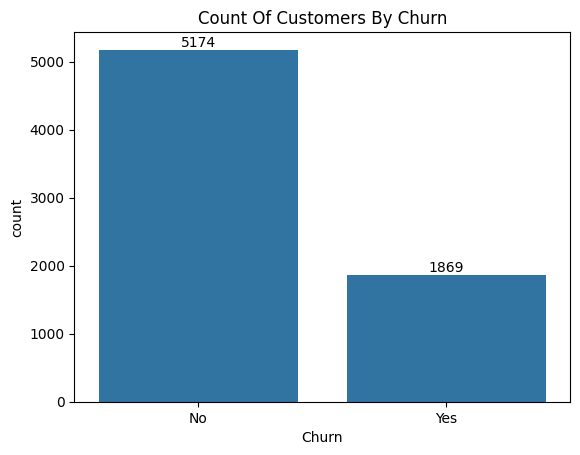

In [11]:
ax = sns.countplot(x = 'Churn', data = df) # simply print the  bar graph
ax.bar_label(ax.containers[0]) #print the bar graph with extact values of churn people
plt.title("Count Of Customers By Churn") 
plt.show()

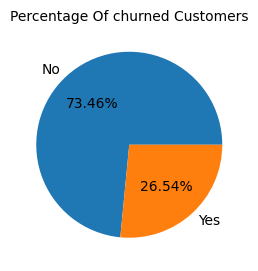

In [12]:
plt.figure(figsize = (3,4)) # to give size of a fig bydefalut it is big
#gb is used for groupby and count for count the people in number
gb = df.groupby("Churn").agg({'Churn':"count"})
# labels to show yes/no index values of gb and autopct for percentage
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of churned Customers", fontsize = 10)
plt.show()

# from given pie chart we can conclude that 26.54%  of our customers have churned out.
# now let's explore the reason behind it

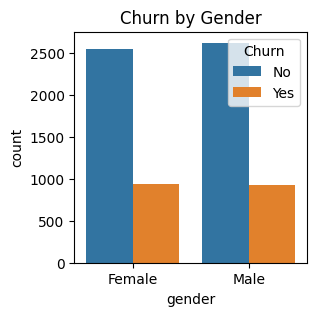

In [13]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender" , data = df, hue = "Churn" )
plt.title("Churn by Gender")
plt.show()

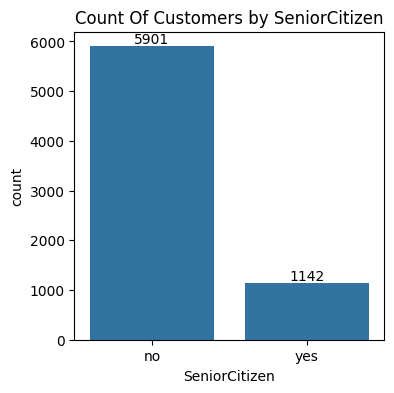

In [14]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen" , data = df )
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers by SeniorCitizen")
plt.show()

# Comparatively a greater percentage of people in senior citizen category have churned

Churn                No       Yes
SeniorCitizen                    
no             0.763938  0.236062
yes            0.583187  0.416813


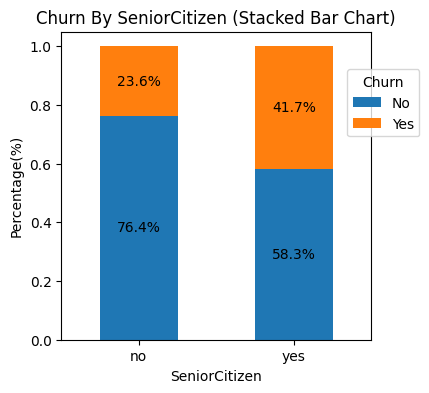

In [15]:

# Group by 'SeniorCitizen' and calculate the churn proportions
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack(fill_value=0)

# Check the resulting 'total_counts' DataFrame to ensure it has proportions
print(total_counts)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the stacked bar chart
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Loop through the patches to add text annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    # Add text inside the bar (calculating the y-position to center it)
    ax.text(x + width / 2, y + height / 2, f'{height * 100:.1f}%', ha='center', va='center')

# Set the title and labels
plt.title('Churn By SeniorCitizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage(%)')

# Set the x-ticks and rotate them for better readability
plt.xticks(rotation=0)

# Set the legend title and location
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))

# Show the plot
plt.show()


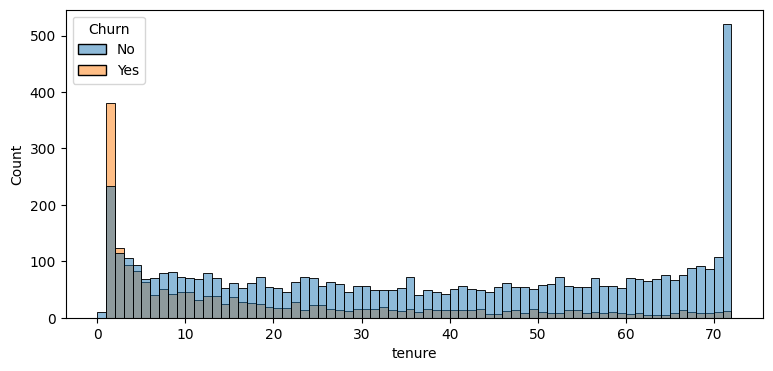

In [16]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

# people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

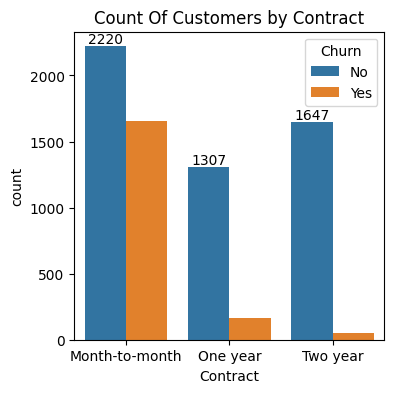

In [17]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract" , data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers by Contract")
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 to 2 years contract

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

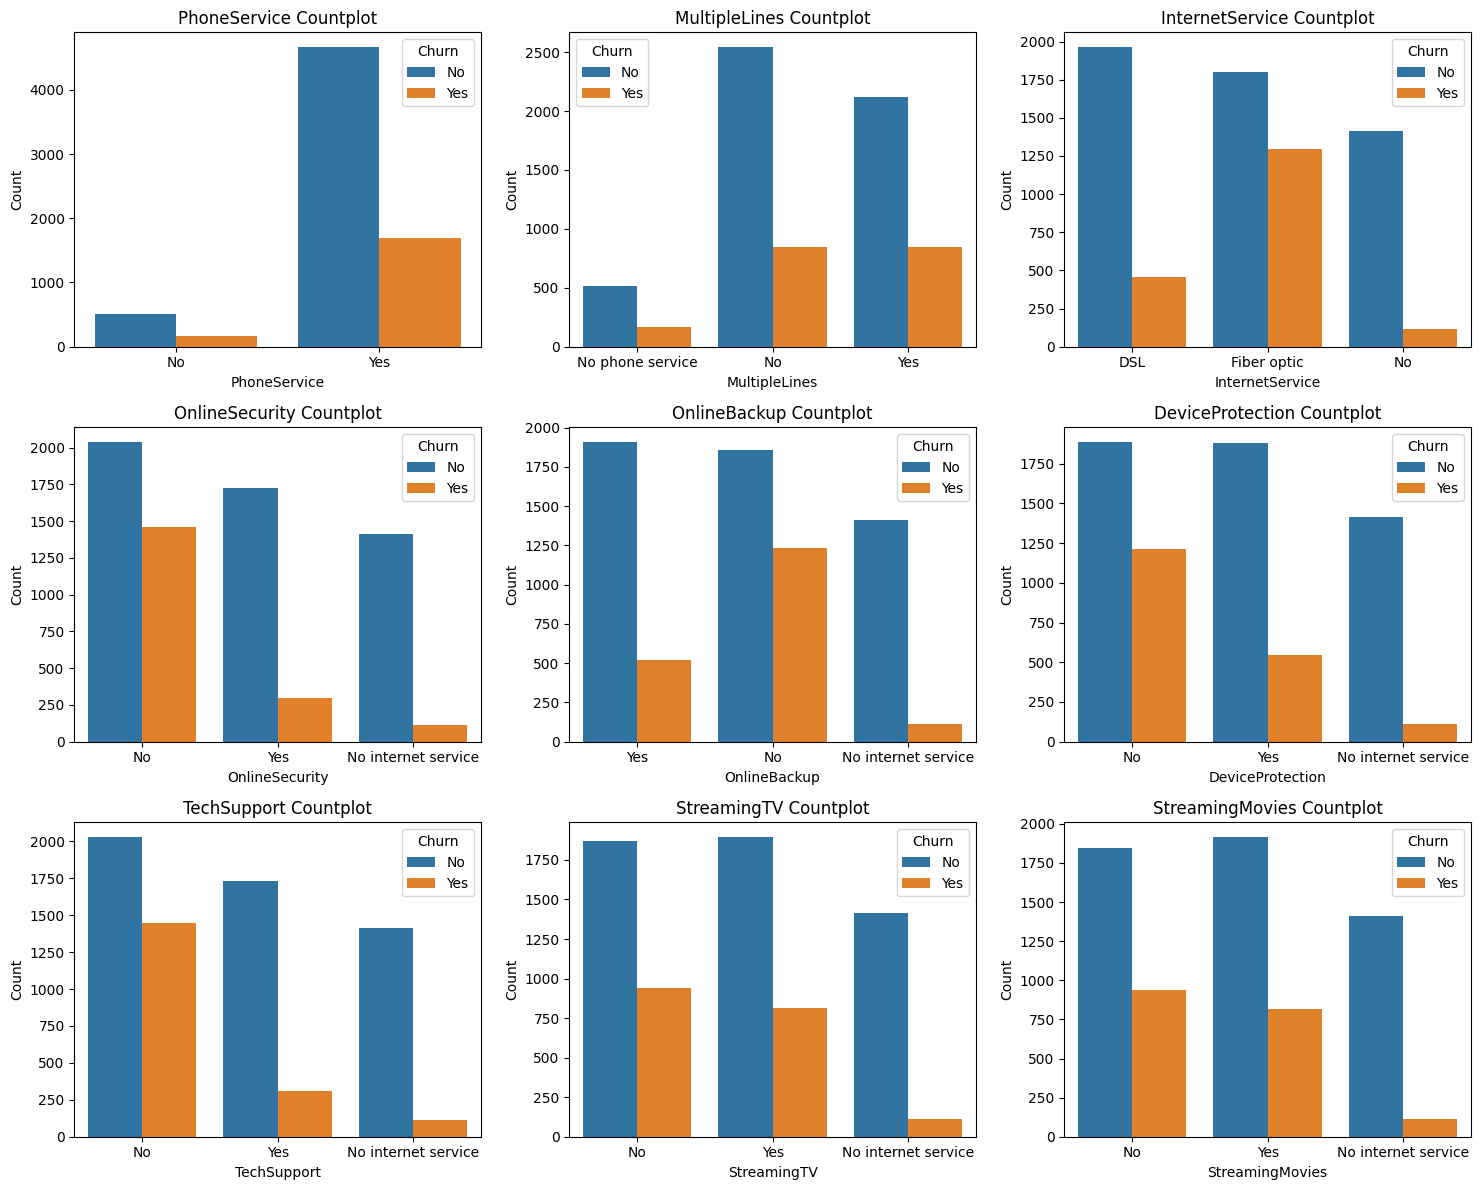

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace with your actual data)
# df = pd.read_csv("your_data.csv")  # Uncomment this line to load your dataset

# Columns for which count plots will be created
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of subplots (3 rows, 3 columns)
n_rows = 3
n_cols = 3

# Create a figure for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over the columns and plot countplots
for idx, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[idx] , hue = df["Churn"])
    axes[idx].set_title(f'{column} Countplot')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')

# Adjust layout to make space for titles and labels
plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have services like PhoneService, InternetService(particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup,TechSupport, and streaming TV churn rates are noticably higher when these services are not used or are unavailable.

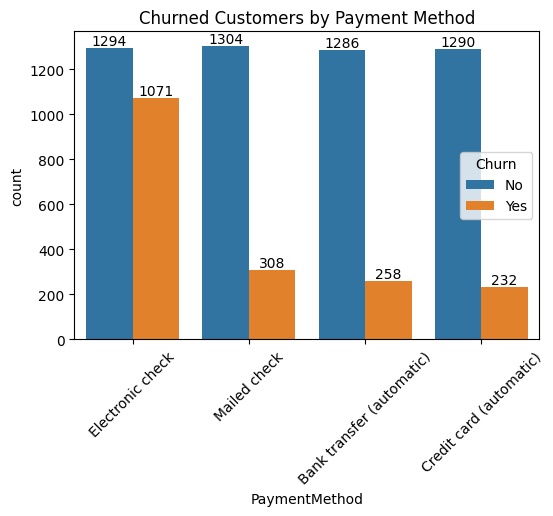

In [ ]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod" , data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45) # to mension values of x labels correctly
plt.show()

# customers are likely to churn when he using electronic check as a payment method